In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

# Linear regression with mini-batch gradient descent

In [2]:
class SimpleLinearRegression_MiniBatchGD:
    def __init__(self):
        pass
    
    # Class Methods
    def fit(self, X, y, batch_size, α=0.1, max_iter=int(1e4)):
        m, n = X.shape
        
        # Shuffle the rows
        data = np.hstack((X, y.reshape(-1,1)))
        np.random.shuffle(data)
        
        # Initialize the parameters
        w = np.random.rand(n)
        b = 0
        
        # Mini-batch gradient descent step
        for iteration in range(max_iter):
            for i in range(0, m, batch_size):
                # Gets the ith batch from X_train and y_train
                X_batch_i = data[i:i+batch_size,0].reshape((-1, 1))
                y_batch_i = data[i:i+batch_size,1].reshape((-1,1))

                # Update rule for the model parameters
                w = w - (α / batch_size) * np.dot(X_batch_i.T.flatten(), (self.__h(X_batch_i,w,b) - y_batch_i.reshape((-1,1))).flatten())
                b = b - (α / batch_size) * np.sum(self.__h(X_batch_i, w, b) - y_batch_i.reshape((-1,1)))
                
                # np.sum([(self.__h(X_batch_i[j], w, b) - y_batch_i[j]) * X_batch_i[j] for j in range(len(X_batch_i))])
        self.w = w
        self.b = b
        
        
    ## For making predictions
    def predict(self, x_new):
        return self.__h(x_new, self.w, self.b) #self.w * x_new + self.b
        
    
    # Private methods
    def __h(self, x, w, b):
        return w * x + b

# Test

<IPython.core.display.Javascript object>


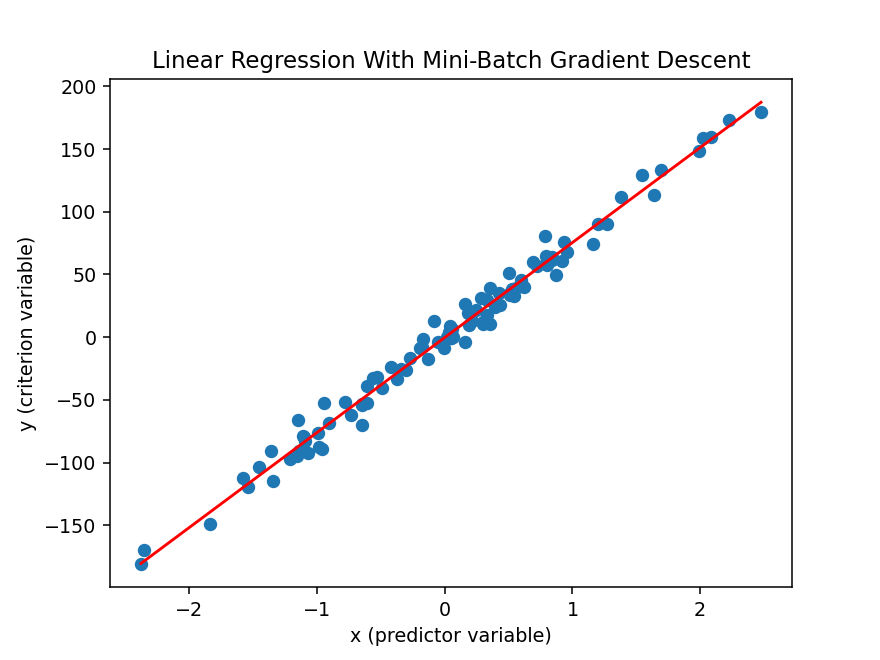

Text(0.5, 1.0, 'Linear Regression With Mini-Batch Gradient Descent')

In [3]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=4)

# Fit the model
lin_reg = SimpleLinearRegression_MiniBatchGD()
lin_reg.fit(X, y, 20, .3)

plt.figure()
plt.scatter(X, y)

xs_line = np.linspace(np.min(X), np.max(X))
plt.plot(xs_line, lin_reg.predict(xs_line), 'red') #lin_reg.b + lin_reg.w*xs_line

plt.xlabel("x (predictor variable)")
plt.ylabel("y (criterion variable)")
plt.title("Linear Regression With Mini-Batch Gradient Descent")